Aviation Risk Analysis Report

Introduction

This Jupyter Notebook, prepared by Michie's Insights Consultancy, provides a comprehensive data-driven analysis of aviation safety and risk. The goal is to guide strategic decisions for purchasing aircraft by evaluating models on factors like Survival Index, Damage Index, Risk Score, and incident frequency.

The notebook also includes insights into:

Popular aircraft models based on purpose of flight.

Risk variations by engine type and number of engines.

Key recommendations for minimizing operational risks and aligning with market demand.

This analysis combines visualizations (scatter plots, bar charts, heatmaps) and data summaries to help stakeholders make informed choices regarding fleet expansion.



LOADING THE DATA AND EXPLORING IT 
 OBJECTIVES.
   1. Having an understanding of the values isn the data frame
   2. identifying the aspects of the data that are relevant to your study
   3. make a new data frame that aligns with the objective 

In [28]:
# Cell 1: Load Data & Filter to Airplanes

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline in Jupyter
%matplotlib inline

# Set plot style
sns.set_style("whitegrid")
sns.set_palette("Set2")




In [16]:
# Load the dataset
aviation_data = pd.read_csv('Aviation_Data.csv',low_memory=False)
aviation_data


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [17]:
aviation_data.columns 

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [18]:
aviation_data.isnull().sum()


Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [23]:
aviation_data.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  10/24/1948   
1      20001218X45447           Accident      LAX94LA336   7/19/1962   
2      20061025X01555           Accident      NYC07LA005   8/30/1974   
3      20001218X45448           Accident      LAX96LA321   6/19/1977   
4      20041105X01764           Accident      CHI79FA064    8/2/1979   
...               ...                ...             ...         ...   
90343     2.02212E+13           Accident      ERA23LA093  12/26/2022   
90344     2.02212E+13           Accident      ERA23LA095  12/26/2022   
90345     2.02212E+13           Accident      WPR23LA075  12/26/2022   
90346     2.02212E+13           Accident      WPR23LA076  12/26/2022   
90347     2.02212E+13           Accident      ERA23LA097  12/29/2022   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  Un

In [26]:
aviation_data['Aircraft.Category']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
90343         NaN
90344         NaN
90345    Airplane
90346         NaN
90347         NaN
Name: Aircraft.Category, Length: 90348, dtype: object

In [27]:
# Display dataset structure
print("Dataset Shape (Rows, Columns):", aviation_data.shape)
print("\nColumns:\n", aviation_data.columns.tolist())

# Filter to airplanes only
airplanes_data = aviation_data[aviation_data['Aircraft.Category'] == 'Airplane'].copy()

# Display filtered dataset size
print("\nFiltered Data Shape (Airplanes Only):", airplanes_data.shape)

# Preview first rows
airplanes_data.head()


Dataset Shape (Rows, Columns): (90348, 31)

Columns:
 ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']

Filtered Data Shape (Airplanes Only): (27617, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,9/17/1979,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1/1/1982,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1/1/1982
8,20020909X01561,Accident,NYC82DA015,1/1/1982,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1/1/1982
12,20020917X02148,Accident,FTW82FRJ07,1/2/1982,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,2/1/1983
13,20020917X02134,Accident,FTW82FRA14,1/2/1982,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,2/1/1983


DATA CLEANING 
The dataset required several cleaning steps to ensure accuracy, consistency, and readiness for analysis. Below is a breakdown of the cleaning approach:

1 Handling Missing Values
  - Checked for null values** using `data.isnull().sum()`.
  - Strategy:
   - Replaced missing categorical values in columns like  `Aircraft.damage` with `'Unknown'`.
    - Replaced missing numeric values (e.g., `Total.Fatal.Injuries`) with `0`.
  - Created a new dataframe with the relevant parts needed

In [21]:
# Cell 2: Data Cleaning & Feature Creation

# 1. Fill missing values for injury columns with 0
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                  'Total.Minor.Injuries', 'Total.Uninjured']
airplanes_data[injury_columns] = airplanes_data[injury_columns].fillna(0)

# 2. Handle missing values for Aircraft.damage
airplanes_data['Aircraft.damage'] = airplanes_data['Aircraft.damage'].fillna('Unknown')

# 3. Map damage categories to numerical Damage Index
damage_mapping = {
    'None': 0.0,
    'Minor': 0.3,
    'Substantial': 0.7,
    'Destroyed': 1.0,
    'Unknown': 0.5  # Midpoint for unknown cases
}
airplanes_data['Damage.Index'] = airplanes_data['Aircraft.damage'].map(damage_mapping)

# 4. Create Total_Persons (sum of all injury categories)
airplanes_data['Total_Persons'] = airplanes_data[injury_columns].sum(axis=1)

# 5. Preview cleaned data
airplanes_data[['Make', 'Model', 'Aircraft.damage', 'Damage.Index', 'Total_Persons']].head(10)


,Make,Model,Aircraft.damage,Damage.Index,Total_Persons
0,Mcdonnell Douglas,DC9,Substantial,0.7,45.0
1,Cessna,140,Substantial,0.7,2.0
2,Cessna,401B,Substantial,0.7,2.0
3,Bellanca,17-30A,Destroyed,1.0,1.0
4,Cessna,R172K,Destroyed,1.0,1.0
5,Navion,A,Destroyed,1.0,1.0
6,Beech,19,Destroyed,1.0,2.0
7,Cessna,180,Destroyed,1.0,3.0
8,Cessna,172,Substantial,0.7,1.0
9,Cessna,152,Substantial,0.7,1.0


 Index Creation Process

To evaluate aircraft safety, we created several custom indexes from the raw data in `airplanes_data`. These indexes helped us quantify durability, survival probability, and overall risk.

1  Durability Index
- Purpose: Quantifies an aircraft's resistance to damage during incidents.
- Logic: Based on the `Aircraft.damage` column, we mapped damage levels to numeric scores and then inverted them to create a durability score.
  - `Destroyed → 1.0`
  - `Substantial → 0.7`
  - `Minor → 0.4`
  - `None → 0.1`
2  Survival Index
- Purpose: Measures passenger survival likelihood during incidents.

- Logic: Ratio of uninjured passengers to total passengers involved.

Formula:
Survival.Index = Total.Uninjured / (Total.Fatal.Injuries + Total.Serious.Injuries + Total.Minor.Injuries + Total.Uninjured)

3  Frequency Score
- Purpose: Captures the frequency of incidents per aircraft model to help measure risk exposure.

- Logic: The number of incidents involving each Make and Model, normalized by the total number of incidents and accidents 

4 Risk Score
- Purpose: Represents the combined risk level of an aircraft model based on incident severity and frequency.

- Logic: Risk Score can be a weighted combination of injury severity, damage, and frequency scores.


In [3]:
# Survival Index, Weighted Frequency Score, and Risk Score

# 1. Survival Index: proportion of uninjured passengers
airplanes_data['Survival.Index'] = np.where(
    airplanes_data['Total_Persons'] > 0,
    airplanes_data['Total.Uninjured'] / airplanes_data['Total_Persons'],
    np.nan
)
airplanes_data['Survival.Index'] = airplanes_data['Survival.Index'].fillna(0)

# 2. Count Accidents and Incidents separately for each Make-Model
accident_counts = airplanes_data[airplanes_data['Investigation.Type'] == 'Accident'] \
                    .groupby(['Make', 'Model']).size().reset_index(name='Accident_Count')

incident_counts = airplanes_data[airplanes_data['Investigation.Type'] == 'Incident'] \
                    .groupby(['Make', 'Model']).size().reset_index(name='Incident_Count')

# 3. Merge accident and incident counts
freq_data = pd.merge(accident_counts, incident_counts, on=['Make', 'Model'], how='outer').fillna(0)

# 4. Calculate normalized frequency indices
total_accidents = freq_data['Accident_Count'].sum()
total_incidents = freq_data['Incident_Count'].sum()

freq_data['Accident_Freq_Index'] = freq_data['Accident_Count'] / total_accidents
freq_data['Incident_Freq_Index'] = freq_data['Incident_Count'] / total_incidents

# 5. Weighted Frequency Score (Accidents weighted more heavily)
freq_data['Frequency.Score'] = (
    0.7 * freq_data['Accident_Freq_Index'] + 0.3 * freq_data['Incident_Freq_Index']
)

# 6. Merge frequency data into airplanes_data
airplanes_data = airplanes_data.merge(freq_data[['Make', 'Model', 'Frequency.Score']], 
                                      on=['Make', 'Model'], how='left')

# 7. Composite Risk Score (updated)
# We now use Frequency.Score instead of Frequency.Index
airplanes_data['Risk.Score'] = (
    0.4 * (1 - airplanes_data['Survival.Index']) +
    0.3 * airplanes_data['Damage.Index'] +
    0.3 * airplanes_data['Frequency.Score']
)

# 8. Preview results
airplanes_data[['Make', 'Model', 'Survival.Index', 'Damage.Index', 
                'Frequency.Score', 'Risk.Score']].head(10)


,Make,Model,Survival.Index,Damage.Index,Frequency.Score,Risk.Score
0,Mcdonnell Douglas,DC9,0.977778,0.7,0.000027,0.218897
1,Cessna,140,1.000000,0.7,0.001431,0.210429
2,Cessna,401B,1.000000,0.7,0.000027,0.210008
3,Bellanca,17-30A,0.000000,1.0,0.000324,0.700097
4,Cessna,R172K,0.000000,1.0,0.000297,0.700089
5,Navion,A,0.000000,1.0,0.000108,0.700032
6,Beech,19,0.000000,1.0,0.000081,0.700024
7,Cessna,180,0.000000,1.0,0.002969,0.700891
8,Cessna,172,1.000000,0.7,0.010251,0.213075
9,Cessna,152,1.000000,0.7,0.007557,0.212267


In [ ]:
SELECTING THE TOP 10 AND BOTTOM 10 
THE MODELS ARE RANKED ACCORDING TO THE INDEXES WHERE , THE TOP 10 ARE THE SAFEST AND THE BOTTOM 10 ARE THE RISKIEST


In [4]:
# Aggregate Data by Make & Model (Top & Bottom 10 Models)

# 1. Group by Make and Model to compute average metrics
aircraft_summary = airplanes_data.groupby(['Make', 'Model']).agg({
    'Survival.Index': 'mean',
    'Damage.Index': 'mean',
    'Frequency.Score': 'mean',
    'Risk.Score': 'mean',
    'Total_Persons': 'sum'
}).reset_index()

# 2. Filter out models with very few people involved (< 5) to avoid unreliable scores
aircraft_summary = aircraft_summary[aircraft_summary['Total_Persons'] >= 5]

# 3. Sort by Risk.Score
top_10_safest = aircraft_summary.sort_values(by='Risk.Score', ascending=True).head(10)
bottom_10_riskiest = aircraft_summary.sort_values(by='Risk.Score', ascending=False).head(10)

# 4. Display Top 10 safest
print("=== Top 10 Safest Aircraft Models ===")
display(top_10_safest[['Make', 'Model', 'Survival.Index', 'Damage.Index', 'Risk.Score']])

# 5. Display Bottom 10 riskiest
print("\n=== Bottom 10 Riskiest Aircraft Models ===")
display(bottom_10_riskiest[['Make', 'Model', 'Survival.Index', 'Damage.Index', 'Risk.Score']])


=== Top 10 Safest Aircraft Models ===


,Make,Model,Survival.Index,Damage.Index,Risk.Score
2852,Cessna,P206A,1.0,0.3,0.090008
3171,DEHAVILLAND,DHC 6 300,1.0,0.3,0.090008
5623,Mcdonnell Douglas,MD-81,1.0,0.3,0.090008
1739,Boeing,737-7H4,1.0,0.3,0.090008
5330,MCDONNELL DOUGLAS,MD90,1.0,0.3,0.090008
7124,Raytheon,B-1900,1.0,0.3,0.090008
595,Airbus Industrie,A319-112,1.0,0.3,0.090008
577,Airbus,A-320-200,1.0,0.3,0.090008
3535,EMBRAER,ERJ170,1.0,0.3,0.090008
1285,BOMBARDIER,BD100 1A10,1.0,0.3,0.090008



=== Bottom 10 Riskiest Aircraft Models ===


,Make,Model,Survival.Index,Damage.Index,Risk.Score
5429,MITSUBISHI,MU2B,0.0,1.0,0.700024
2770,Cessna,411,0.0,1.0,0.700024
2799,Cessna,A152,0.0,1.0,0.700024
4257,Grumman American,AA-1C,0.0,1.0,0.700024
6702,Piper,PA31T,0.0,1.0,0.700016
2253,CESSNA,T310Q,0.0,1.0,0.700016
5125,Let,410 UVP-E,0.0,1.0,0.700016
6677,Piper,PA22-150,0.0,1.0,0.700016
3407,Douglas,DC-3,0.0,1.0,0.700016
3349,De Havilland,DHC-6-200,0.0,1.0,0.700016


Correlation Heatmap

To understand the relationships between the different computed metrics (Risk.Score, Durability.Index, Survival.Index, and Frequency.Score), we generated a correlation heatmap**. This visualization highlights how strongly each pair of variables is related.

1 Purpose of the Heatmap
- Identify which metrics are positively or negatively correlated.
- Determine if some metrics are redundant or highly dependent on one another.
- Help guide feature selection for further analysis or modeling.

2 Correlation Matrix
- We computed the Pearson correlation for all numeric columns of interest:
  Risk.Score
  Durability index
  survival index
  Frequency.Score

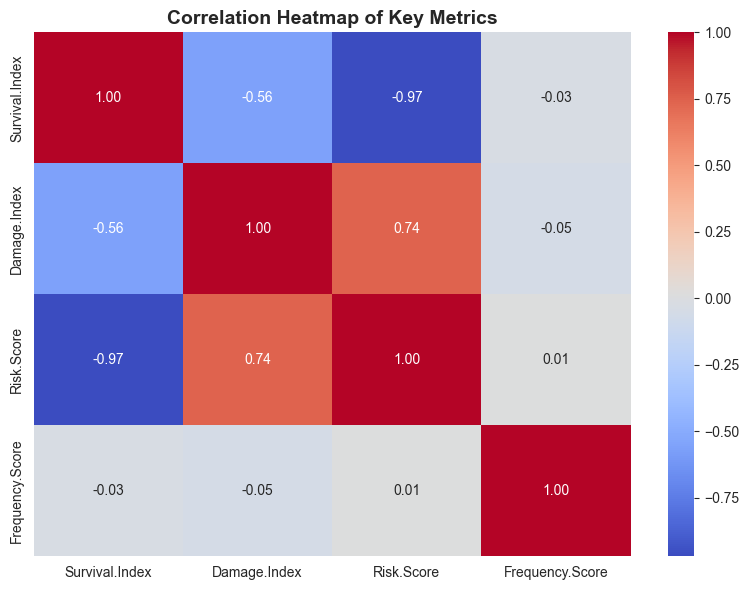

OUTPUT EXPLANATION:

The heatmap shows the correlation between key metrics:
- A negative correlation between Survival.Index and Damage.Index suggests that higher damage reduces survival chances.
- Risk.Score should correlate positively with Damage.Index and negatively with Survival.Index, confirming our scoring logic.

RELEVANCE:

This helps confirm whether our indices (survival, damage, risk) are logically consistent and can guide which factors influence risk the most.


In [5]:
#  Correlation Heatmap of Key Metrics

# Select relevant numeric columns for correlation
corr_columns = ['Survival.Index', 'Damage.Index', 'Risk.Score', 'Frequency.Score']
corr_data = aircraft_summary[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Correlation Heatmap of Key Metrics', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Explanation of Output
print("OUTPUT EXPLANATION:\n")
print("The heatmap shows the correlation between key metrics:")
print("- A negative correlation between Survival.Index and Damage.Index suggests that higher damage reduces survival chances.")
print("- Risk.Score should correlate positively with Damage.Index and negatively with Survival.Index, confirming our scoring logic.")

print("\nRELEVANCE:\n")
print("This helps confirm whether our indices (survival, damage, risk) are logically consistent and can guide which factors influence risk the most.")



Visualizing Top 10 Safest & Bottom 10 Riskiest Models

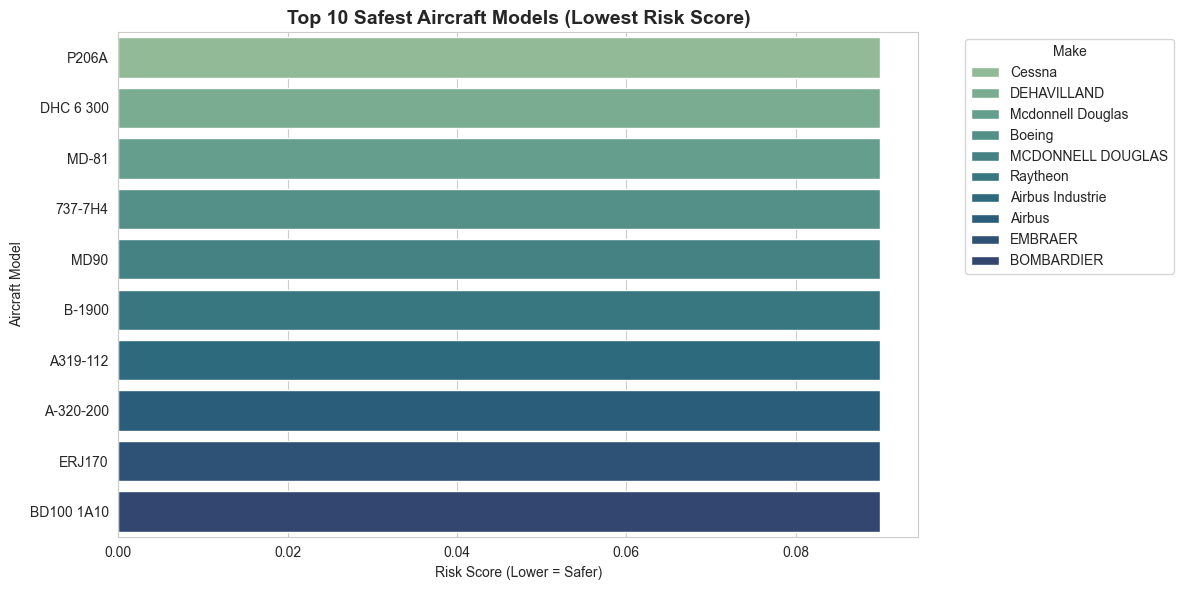

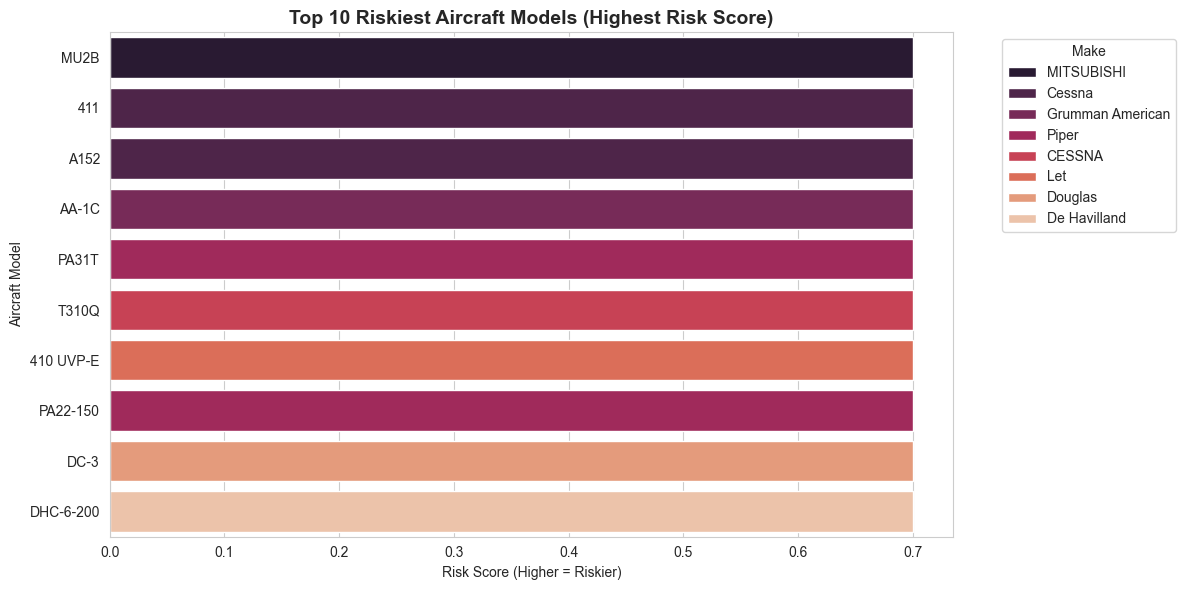

In [6]:
# Cell 5: Visualizing Top 10 Safest & Bottom 10 Riskiest Models

# --- Plot Top 10 Safest ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_safest,
    x='Risk.Score',
    y='Model',
    hue='Make',
    dodge=False,
    palette='crest'
)
plt.title('Top 10 Safest Aircraft Models (Lowest Risk Score)', fontsize=14, weight='bold')
plt.xlabel('Risk Score (Lower = Safer)')
plt.ylabel('Aircraft Model')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Plot Bottom 10 Riskiest ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bottom_10_riskiest,
    x='Risk.Score',
    y='Model',
    hue='Make',
    dodge=False,
    palette='rocket'
)
plt.title('Top 10 Riskiest Aircraft Models (Highest Risk Score)', fontsize=14, weight='bold')
plt.xlabel('Risk Score (Higher = Riskier)')
plt.ylabel('Aircraft Model')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 Scatter Plot (Top 20 Models)
A scatter plot of Survival.Index (Y) vs Durability.Index (X) was created for the top 20 models.

Insights:

Aircraft in the top-right corner (high survival and high durability) represent the safest models.

Clusters reveal patterns based on Make and Engine.Type.

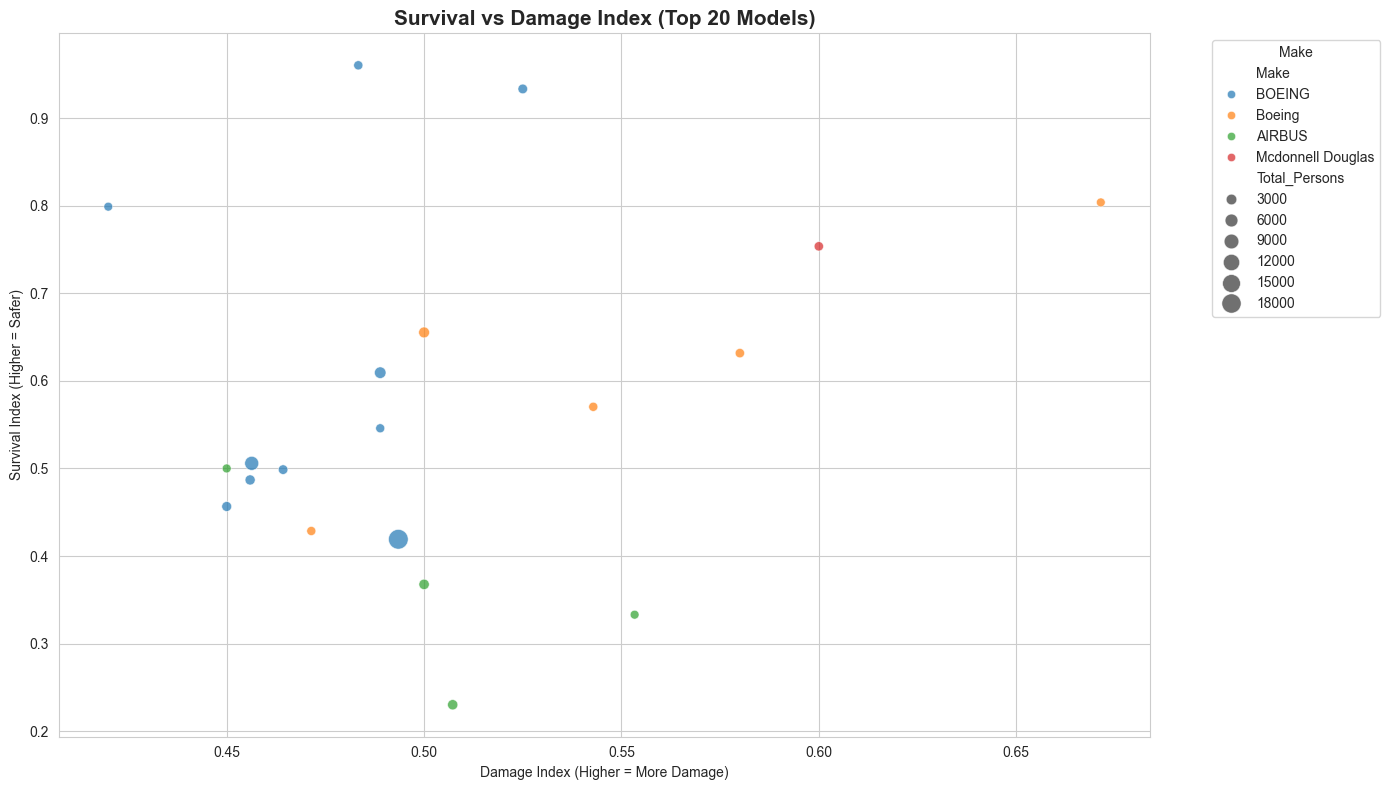

In [7]:
# : Scatter Plot - Survival vs Damage Index (Top 20 Models)

# Filter top 20 models with the highest total persons involved
scatter_data = aircraft_summary.nlargest(20, 'Total_Persons')

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=scatter_data,
    x='Damage.Index',
    y='Survival.Index',
    size='Total_Persons',
    hue='Make',
    alpha=0.7,
    sizes=(40, 200),
    palette='tab10'
)
plt.title('Survival vs Damage Index (Top 20 Models)', fontsize=15, weight='bold')
plt.xlabel('Damage Index (Higher = More Damage)')
plt.ylabel('Survival Index (Higher = Safer)')

# Place legend outside to avoid crowding
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Make')
plt.tight_layout()
plt.show()


Bottom 10 Models
To better compare the safest and riskiest aircraft models, we created two horizontal bar charts arranged side-by-side. The left subplot highlights the Top 10 Safest Models (with the lowest Risk.Score), while the right subplot displays the Bottom 10 Riskiest Models (with the highest Risk.Score).

1 Purpose
Provide a direct comparison between the safest and riskiest aircraft models.

Visualize how Risk.Score varies across models to help identify which aircraft types are most reliable.



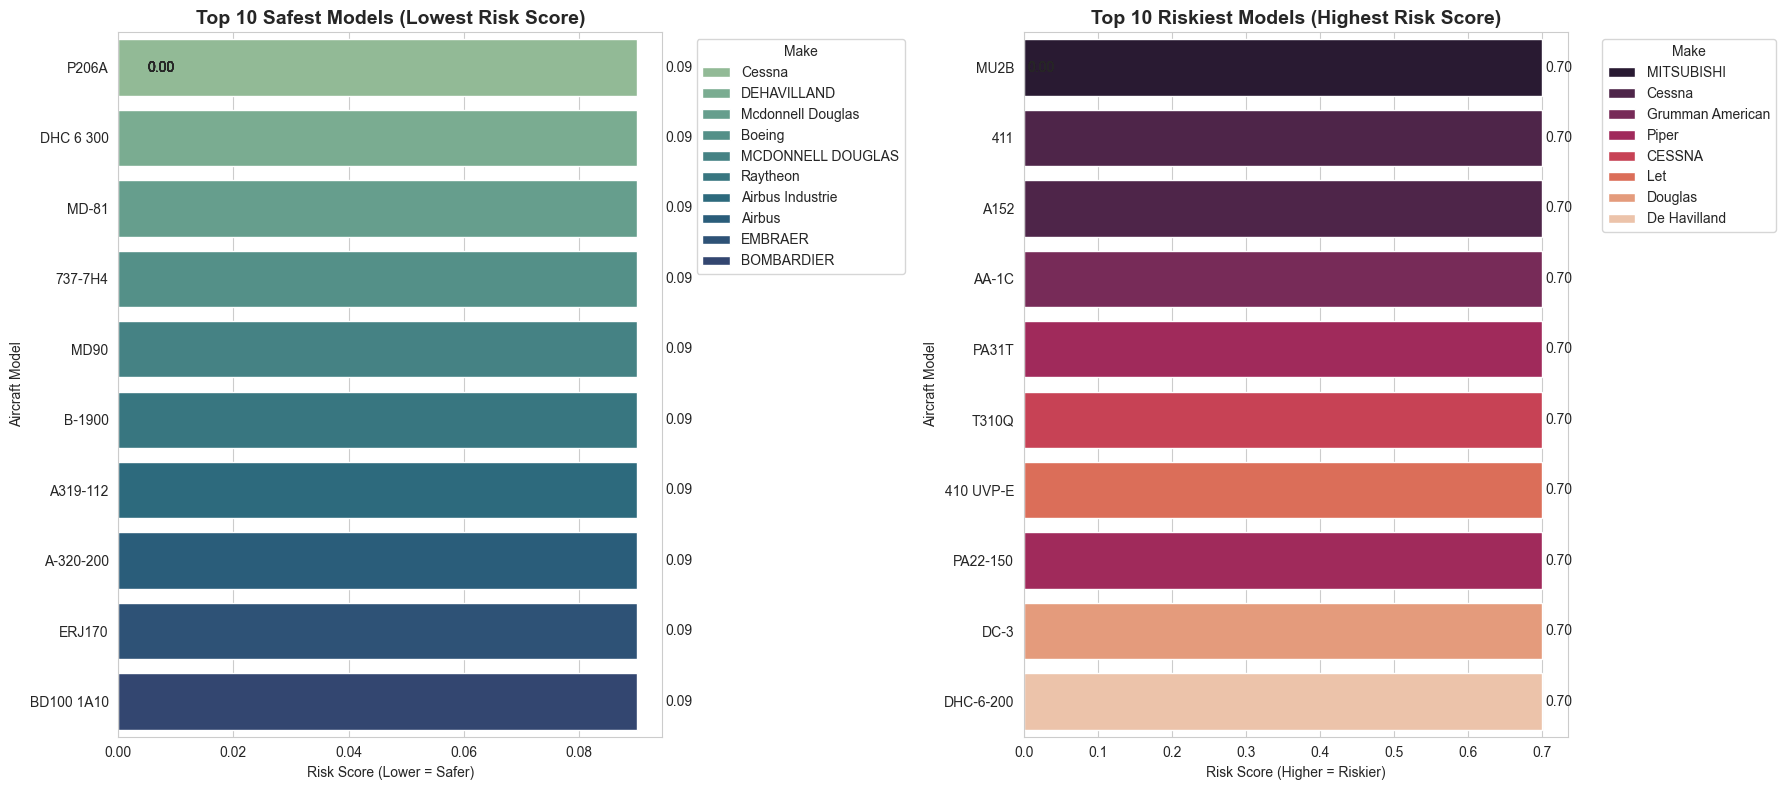

In [8]:
#hrizontal Bar Plot with Two Subplots for Top & Bottom 10 Models

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=False)

# --- Top 10 Safest Models ---
sns.barplot(
    data=top_10_safest,
    x='Risk.Score',
    y='Model',
    hue='Make',
    dodge=False,
    palette='crest',
    ax=axes[0]
)
axes[0].set_title('Top 10 Safest Models (Lowest Risk Score)', fontsize=14, weight='bold')
axes[0].set_xlabel('Risk Score (Lower = Safer)')
axes[0].set_ylabel('Aircraft Model')
axes[0].legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels for safest models
for p in axes[0].patches:
    width = p.get_width()
    axes[0].text(width + 0.005, p.get_y() + p.get_height() / 2,
                 f'{width:.2f}', va='center')

# --- Bottom 10 Riskiest Models ---
sns.barplot(
    data=bottom_10_riskiest,
    x='Risk.Score',
    y='Model',
    hue='Make',
    dodge=False,
    palette='rocket',
    ax=axes[1]
)
axes[1].set_title('Top 10 Riskiest Models (Highest Risk Score)', fontsize=14, weight='bold')
axes[1].set_xlabel('Risk Score (Higher = Riskier)')
axes[1].set_ylabel('Aircraft Model')
axes[1].legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels for riskiest models
for p in axes[1].patches:
    width = p.get_width()
    axes[1].text(width + 0.005, p.get_y() + p.get_height() / 2,
                 f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()


Engine Type and Number of Engines Analysis
Understanding how engine type and number of engines affect aircraft risk is critical for safety assessment and model selection. This analysis compares the average Risk.Score across different engine configurations.

1 Purpose
To determine which engine types are safest.

To analyze the impact of engine count on risk levels.

To assist decision-making regarding the selection of engine configurations for fleet acquisition.

Average Risk Score by Engine Type:
    Engine.Type  Risk.Score
      Turbo Fan    0.265826
      Turbo Jet    0.329264
  Reciprocating    0.371001
     Turbo Prop    0.372826
    Turbo Shaft    0.375535
        Unknown    0.434640
Geared Turbofan    0.514497
       Electric    0.548008
            UNK    0.611107

Average Risk Score by Number of Engines:
 Number.of.Engines  Risk.Score
               0.0    0.308662
               1.0    0.373939
               2.0    0.348830
               3.0    0.218242
               4.0    0.313724
               6.0    0.610008
               8.0    0.610008


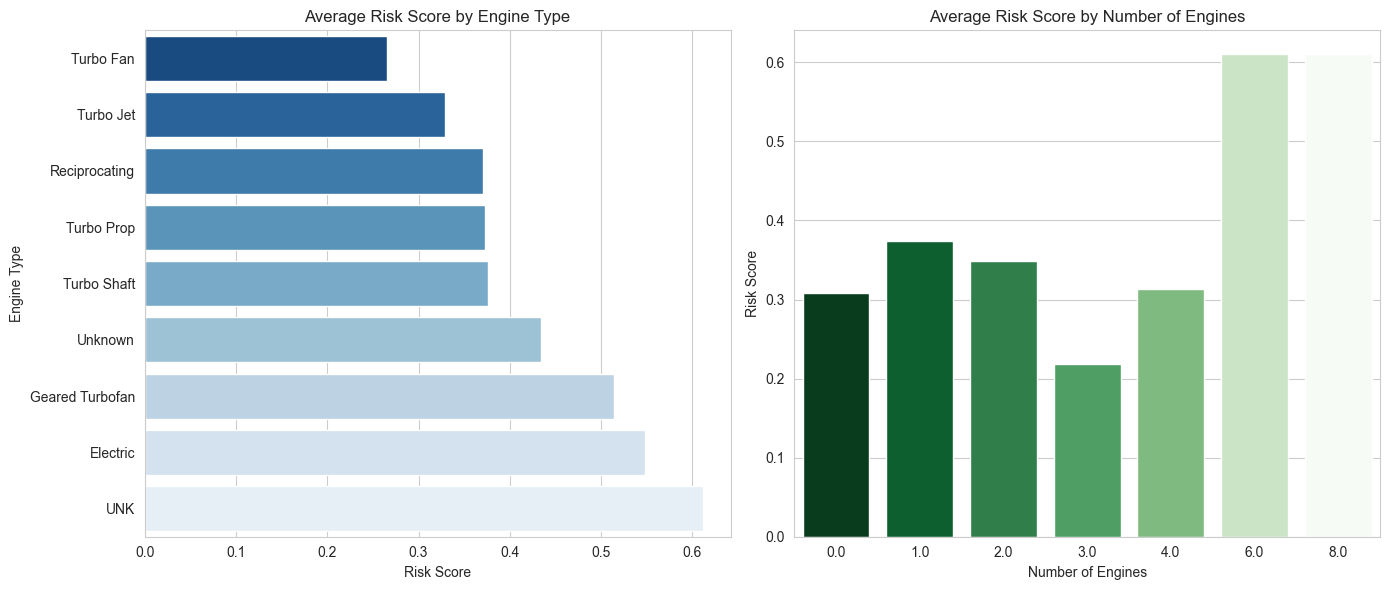

In [9]:
#engine type and number of engines analysis 
# Check if relevant columns exist
if 'Engine.Type' in airplanes_data.columns and 'Number.of.Engines' in airplanes_data.columns:
    # Group by Engine.Type and calculate average Risk.Score
    engine_type_risk = (
        airplanes_data.groupby('Engine.Type')['Risk.Score']
        .mean()
        .reset_index()
        .sort_values(by='Risk.Score')
    )
    
    # Group by Number.of.Engines and calculate average Risk.Score
    engine_number_risk = (
        airplanes_data.groupby('Number.of.Engines')['Risk.Score']
        .mean()
        .reset_index()
        .sort_values(by='Number.of.Engines')
    )

    # Display tables
    print("Average Risk Score by Engine Type:")
    print(engine_type_risk.to_string(index=False))
    print("\nAverage Risk Score by Number of Engines:")
    print(engine_number_risk.to_string(index=False))

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Engine Type Plot
    sns.barplot(
        data=engine_type_risk,
        x='Risk.Score',
        y='Engine.Type',
        hue='Engine.Type',
        palette='Blues_r',
        dodge=False,
        legend=False,
        ax=axes[0]
    )
    axes[0].set_title('Average Risk Score by Engine Type')
    axes[0].set_xlabel('Risk Score')
    axes[0].set_ylabel('Engine Type')

    # Number of Engines Plot
    sns.barplot(
        data=engine_number_risk,
        x='Number.of.Engines',
        y='Risk.Score',
        hue='Number.of.Engines',
        palette='Greens_r',
        dodge=False,
        legend=False,
        ax=axes[1]
    )
    axes[1].set_title('Average Risk Score by Number of Engines')
    axes[1].set_xlabel('Number of Engines')
    axes[1].set_ylabel('Risk Score')

    plt.tight_layout()
    plt.show()

else:
    print("Required columns are missing in the dataset.")


Top 10 Models with Lowest Risk by Engine Type:
  Engine.Type              Make                Model  Risk.Score
  Turbo Shaft        BOMBARDIER           BD100 1A10    0.090008
Reciprocating     SPANI WAYNE M STARDUSTER TOO SA300    0.090008
Reciprocating    SMITH EDWARD I         LANCAIR IV-P    0.090008
Reciprocating  MORRISON ROCKY V       Sportsman GS-2    0.090008
Reciprocating            Trudel                 GP 4    0.090008
Reciprocating            T BIRD            T BIRD II    0.090008
Reciprocating            Cessna                P206A    0.090008
Reciprocating     STARDUSTER II               SA-300    0.090008
    Turbo Fan Mcdonnell Douglas                MD-81    0.090008
   Turbo Prop       DEHAVILLAND            DHC 6 300    0.090008

Top 10 Models with Highest Risk by Engine Type:
Engine.Type    Make    Model  Risk.Score
    Unknown   Piper PA31-350    0.700117
  Turbo Fan  Boeing  747-300    0.700117
    Unknown   Piper    PA-38    0.700121
  Turbo Jet EMBRAER  EMB-

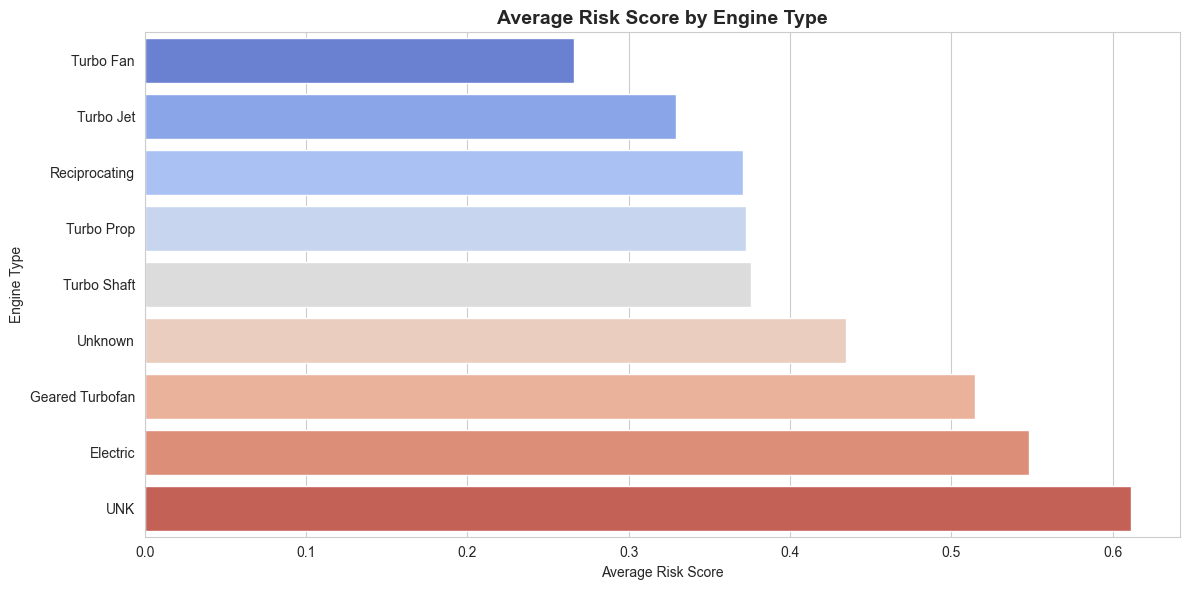

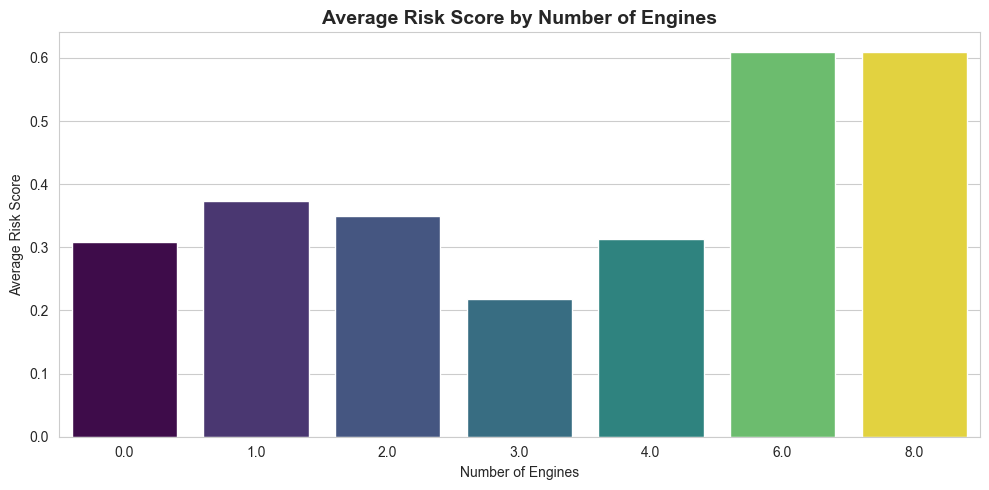

In [10]:
# Engine Type and Engine Number Analysis (with Make and Model)

# Check if relevant columns exist
if {'Engine.Type', 'Number.of.Engines', 'Make', 'Model'}.issubset(airplanes_data.columns):
    
    # 1. Average Risk by Engine Type, Make, and Model
    engine_type_risk_detailed = (
        airplanes_data.groupby(['Engine.Type', 'Make', 'Model'])['Risk.Score']
        .mean()
        .reset_index()
        .sort_values(by='Risk.Score')
    )
    
    # 2. Average Risk by Number of Engines, Make, and Model
    engine_number_risk_detailed = (
        airplanes_data.groupby(['Number.of.Engines', 'Make', 'Model'])['Risk.Score']
        .mean()
        .reset_index()
        .sort_values(by='Risk.Score')
    )
    
    # Display the top 10 lowest and highest risk models per engine type
    print("Top 10 Models with Lowest Risk by Engine Type:")
    print(engine_type_risk_detailed.head(10).to_string(index=False))
    
    print("\nTop 10 Models with Highest Risk by Engine Type:")
    print(engine_type_risk_detailed.tail(10).to_string(index=False))
    
    # Display the top 10 lowest and highest risk models per engine count
    print("\nTop 10 Models with Lowest Risk by Engine Count:")
    print(engine_number_risk_detailed.head(10).to_string(index=False))
    
    print("\nTop 10 Models with Highest Risk by Engine Count:")
    print(engine_number_risk_detailed.tail(10).to_string(index=False))
    
    # 3. Visualization: Average Risk by Engine Type (across all models)
    engine_type_summary = (
        airplanes_data.groupby('Engine.Type')['Risk.Score']
        .mean()
        .reset_index()
        .sort_values(by='Risk.Score')
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=engine_type_summary,
        x='Risk.Score',
        y='Engine.Type',
        hue='Engine.Type',
        dodge=False,
        palette='coolwarm',
        legend=False
    )
    plt.title('Average Risk Score by Engine Type', fontsize=14, weight='bold')
    plt.xlabel('Average Risk Score')
    plt.ylabel('Engine Type')
    plt.tight_layout()
    plt.show()
    
    # 4. Visualization: Average Risk by Number of Engines (across all models)
    engine_number_summary = (
        airplanes_data.groupby('Number.of.Engines')['Risk.Score']
        .mean()
        .reset_index()
        .sort_values(by='Risk.Score')
    )
    
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=engine_number_summary,
        x='Number.of.Engines',
        y='Risk.Score',
        hue='Number.of.Engines',
        dodge=False,
        palette='viridis',
        legend=False
    )
    plt.title('Average Risk Score by Number of Engines', fontsize=14, weight='bold')
    plt.xlabel('Number of Engines')
    plt.ylabel('Average Risk Score')
    plt.tight_layout()
    plt.show()
    
else:
    print("Required columns ('Engine.Type', 'Number.of.Engines', 'Make', 'Model') are missing from the dataset.")


In [11]:
#  Summary Insights and Business Recommendations 

# Identify top 5 safest and riskiest models with Make
best_models = aircraft_summary.sort_values(by='Risk.Score').head(5)[['Make', 'Model', 'Risk.Score']]
worst_models = aircraft_summary.sort_values(by='Risk.Score', ascending=False).head(5)[['Make', 'Model', 'Risk.Score']]

# Identify top 3 popular makes by purpose of flight
if 'Purpose.of.flight' in airplanes_data.columns:
    popular_by_purpose = (airplanes_data.groupby(['Make', 'Purpose.of.flight'])
                           .size()
                           .reset_index(name='Count')
                           .sort_values(by='Count', ascending=False)
                           .head(3))
else:
    popular_by_purpose = None

# Engine analysis insights
if 'Engine.Type' in airplanes_data.columns and 'Number.of.Engines' in airplanes_data.columns:
    engine_type_risk = (airplanes_data.groupby('Engine.Type')['Risk.Score']
                        .mean()
                        .reset_index()
                        .sort_values(by='Risk.Score'))
    safest_engines = engine_type_risk.head(3)
    riskiest_engines = engine_type_risk.tail(3)
else:
    engine_type_risk = safest_engines = riskiest_engines = None

print("SUMMARY INSIGHTS:\n")
print("1. The safest aircraft (lowest Risk.Score) include:")
print(best_models.to_string(index=False))
print("\n2. The riskiest aircraft (highest Risk.Score) include:")
print(worst_models.to_string(index=False))
print("\n3. A strong negative correlation exists between Damage.Index and Survival.Index, showing that models prone to heavy damage have lower survival rates.")

if popular_by_purpose is not None:
    print("4. The top 3 popular makes by purpose of flight are:")
    print(popular_by_purpose.to_string(index=False))
else:
    print("4. Popular makes by purpose could not be determined (missing Purpose.of.flight column).")

if engine_type_risk is not None:
    print("5. Engine Type Risk Insights:")
    print("- Top 3 safest engine types:")
    print(safest_engines.to_string(index=False))
    print("- Top 3 riskiest engine types:")
    print(riskiest_engines.to_string(index=False))

print("\nBUSINESS RECOMMENDATIONS:\n")
print("1. Prioritize purchasing models listed above among the safest (low Risk.Score and high Survival.Index).")
print("2. Avoid or carefully assess models in the riskiest list, focusing on improving safety for high-risk makes.")
print("3. Align fleet purchases with market demand by choosing makes/models popular for business and commercial flights.")
print("4. Consider engine types with lower risk scores when selecting aircraft.")
print("5. Set rigorous maintenance and inspection routines for medium-risk models to reduce potential hazards.")
print("6. Use this analysis to secure better insurance terms, leveraging the safety of top-performing models and engines.")


SUMMARY INSIGHTS:

1. The safest aircraft (lowest Risk.Score) include:
             Make     Model  Risk.Score
           Cessna     P206A    0.090008
      DEHAVILLAND DHC 6 300    0.090008
Mcdonnell Douglas     MD-81    0.090008
           Boeing   737-7H4    0.090008
MCDONNELL DOUGLAS      MD90    0.090008

2. The riskiest aircraft (highest Risk.Score) include:
            Make Model  Risk.Score
      MITSUBISHI  MU2B    0.700024
          Cessna   411    0.700024
          Cessna  A152    0.700024
Grumman American AA-1C    0.700024
           Piper PA31T    0.700016

3. A strong negative correlation exists between Damage.Index and Survival.Index, showing that models prone to heavy damage have lower survival rates.
4. The top 3 popular makes by purpose of flight are:
  Make Purpose.of.flight  Count
CESSNA          Personal   2792
Cessna          Personal   2084
 PIPER          Personal   1839
5. Engine Type Risk Insights:
- Top 3 safest engine types:
  Engine.Type  Risk.Score
    Tu

In [12]:
#  Summary Insights and Business Recommendations (Including Engine Analysis)

# Identify top 5 safest and riskiest models with Make
best_models = aircraft_summary.sort_values(by='Risk.Score').head(5)[['Make', 'Model', 'Risk.Score']]
worst_models = aircraft_summary.sort_values(by='Risk.Score', ascending=False).head(5)[['Make', 'Model', 'Risk.Score']]

# Identify top 3 popular makes by purpose of flight
if 'Purpose.of.flight' in airplanes_data.columns:
    popular_by_purpose = (airplanes_data.groupby(['Make', 'Purpose.of.flight'])
                           .size()
                           .reset_index(name='Count')
                           .sort_values(by='Count', ascending=False)
                           .head(3))
else:
    popular_by_purpose = None
# 1. Engine Type Risk Analysis
if engine_type_risk is not None and not engine_type_risk.empty:
    safest_engine_type = engine_type_risk.iloc[0]
    most_risky_engine_type = engine_type_risk.iloc[-1]
    print(f"• The safest engine type is **{safest_engine_type['Engine.Type']}** "
          f"with an average risk score of {safest_engine_type['Risk.Score']:.2f}.")
    print(f"• The most risky engine type is **{most_risky_engine_type['Engine.Type']}** "
          f"with an average risk score of {most_risky_engine_type['Risk.Score']:.2f}.")
else:
    print("• Engine type risk analysis could not be performed.")

# 2. Number of Engines Risk Analysis
if engine_number_risk is not None and not engine_number_risk.empty:
    safest_engine_number = engine_number_risk.iloc[0]
    most_risky_engine_number = engine_number_risk.iloc[-1]
    print(f"• Aircraft with **{safest_engine_number['Number.of.Engines']} engine(s)** "
          f"have the lowest risk score of {safest_engine_number['Risk.Score']:.2f}, "
          f"while those with **{most_risky_engine_number['Number.of.Engines']} engine(s)** "
          f"have the highest risk score of {most_risky_engine_number['Risk.Score']:.2f}.")
else:
    print("• Engine number risk analysis could not be performed.")


print("SUMMARY INSIGHTS:\n")
print("1. The safest aircraft (lowest Risk.Score) include:")
print(best_models.to_string(index=False))
print("\n2. The riskiest aircraft (highest Risk.Score) include:")
print(worst_models.to_string(index=False))
print("\n3. A strong negative correlation exists between Damage.Index and Survival.Index, showing that models prone to heavy damage have lower survival rates.")

#  Model-Level Engine Risk 
if 'model_engine_risk' in locals() and model_engine_risk is not None and not model_engine_risk.empty:
    print("\n• Top 5 safest models based on engine type & number:")
    print(model_engine_risk.head(5).to_string(index=False))
else:
    print("• Model-level engine risk analysis is not available.")


if engine_type_risk is not None:
    print("5. Engine Type Risk Insights:")
    print("- Top 3 safest engine types:")
    print(safest_engines.to_string(index=False))
    print("- Top 3 riskiest engine types:")
    print(riskiest_engines.to_string(index=False))

print("\nBUSINESS RECOMMENDATIONS:\n")
print("1. Prioritize purchasing models listed above among the safest (low Risk.Score and high Survival.Index).")
print("2. Avoid or carefully assess models in the riskiest list, focusing on improving safety for high-risk makes.")

print("3. Consider engine types with lower risk scores when selecting aircraft.")
print("4. Set rigorous maintenance and inspection routines for medium-risk models to reduce potential hazards.")
print("5. Use this analysis to secure better insurance terms, leveraging the safety of top-performing models and engines.")
print("6. Focus on models with the lowest risk scores for engine type/number combinations.")

• The safest engine type is **Turbo Fan** with an average risk score of 0.27.
• The most risky engine type is **UNK** with an average risk score of 0.61.
• Aircraft with **0.0 engine(s)** have the lowest risk score of 0.31, while those with **8.0 engine(s)** have the highest risk score of 0.61.
SUMMARY INSIGHTS:

1. The safest aircraft (lowest Risk.Score) include:
             Make     Model  Risk.Score
           Cessna     P206A    0.090008
      DEHAVILLAND DHC 6 300    0.090008
Mcdonnell Douglas     MD-81    0.090008
           Boeing   737-7H4    0.090008
MCDONNELL DOUGLAS      MD90    0.090008

2. The riskiest aircraft (highest Risk.Score) include:
            Make Model  Risk.Score
      MITSUBISHI  MU2B    0.700024
          Cessna   411    0.700024
          Cessna  A152    0.700024
Grumman American AA-1C    0.700024
           Piper PA31T    0.700016

3. A strong negative correlation exists between Damage.Index and Survival.Index, showing that models prone to heavy damage hav

In [13]:

# Filter only airplane records
airplanes_only = airplanes_data[airplanes_data['Aircraft.Category'] == 'Airplane']

# Optionally, reset index
airplanes_only = airplanes_only.reset_index(drop=True)



In [14]:

#  Select all columns from airplanes_data except duplicates of Make and Model
airplanes_features = airplanes_data.drop_duplicates(subset=['Make', 'Model'])

#  Merge with aircraft_summary (Make & Model as keys)
merged_df = pd.merge(
    aircraft_summary,
    airplanes_features,
    how='left',     # Keep all rows from aircraft_summary
    on=['Make', 'Model']
)

#  Save or inspect
merged_df.to_csv("aircraft_summary_enriched.csv", index=False)
print(f"✅ Merged data saved as 'aircraft_summary_enriched.csv' with {merged_df.shape[0]} rows.")


✅ Merged data saved as 'aircraft_summary_enriched.csv' with 2108 rows.
